<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/Ex1_Template_Matching_and_Corners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction: download files from Google Drive

In [ ]:
# Install Google Drive Download to get file from Google Drive
!pip install googledrivedownloader

# Download a file from Google Drive through file ID
from google_drive_downloader import GoogleDriveDownloader as gdd

# Mechanical parts image
# https://drive.google.com/open?id=1Swx8iQyvFbr2D8NSXXJdM9CrkavMMVF6
gdd.download_file_from_google_drive(file_id='1Swx8iQyvFbr2D8NSXXJdM9CrkavMMVF6',
                                    dest_path='./data/mechanicals.jpg',
                                    unzip=False)

# Einstein image
# https://drive.google.com/open?id=1lxbXKDgqmk8FJkfiEkHwmrqHHv-StjZE
gdd.download_file_from_google_drive(file_id='1lxbXKDgqmk8FJkfiEkHwmrqHHv-StjZE',
                                    dest_path='./data/Einstein.jpg',
                                    unzip=False)

# Einstein' eye image
# https://drive.google.com/open?id=10z4sj5GutcV6Fc7FYNWO4rKhT_jvtXdv
gdd.download_file_from_google_drive(file_id='10z4sj5GutcV6Fc7FYNWO4rKhT_jvtXdv',
                                    dest_path='./data/Einstein_eye_small.png',
                                    unzip=False)

# Messi image
# https://drive.google.com/open?id=1qWrggIURSMvDOyZozAShL72rQz7p-VKM
gdd.download_file_from_google_drive(file_id='1qWrggIURSMvDOyZozAShL72rQz7p-VKM',
                                    dest_path='./data/Messi.jpg',
                                    unzip=False)

# Messi's face image
# https://drive.google.com/open?id=16opIRllpnlnK1A97bd2FA5orb0Apm4dN
gdd.download_file_from_google_drive(file_id='16opIRllpnlnK1A97bd2FA5orb0Apm4dN',
                                    dest_path='./data/Messi_face_small.jpg',
                                    unzip=False)

# Cathedral image
# https://drive.google.com/open?id=1MrDH0JAjTjdS2iPTv-jtWNOCR6zSHfoQ
gdd.download_file_from_google_drive(file_id='1MrDH0JAjTjdS2iPTv-jtWNOCR6zSHfoQ',
                                    dest_path='./data/duomo.png',
                                    unzip=False)

# DIEF (1) image
# https://drive.google.com/open?id=1G6B01Ab2r9jq5Qljw2hGhD-FZmE2dGwl
gdd.download_file_from_google_drive(file_id='1G6B01Ab2r9jq5Qljw2hGhD-FZmE2dGwl',
                                    dest_path='./data/dief_01.jpg',
                                    unzip=False)
# DIEF (2) image
# https://drive.google.com/open?id=13DvPL4TGKhKrkPwB_wK3nv01JhNkuFaS
gdd.download_file_from_google_drive(file_id='13DvPL4TGKhKrkPwB_wK3nv01JhNkuFaS',
                                    dest_path='./data/dief_02.jpg',
                                    unzip=False)
# DIEF (3) image
# https://drive.google.com/open?id=1LaOxjgAJyJmcv3ldeSss-BxpLd43ING8
gdd.download_file_from_google_drive(file_id='1LaOxjgAJyJmcv3ldeSss-BxpLd43ING8',
                                    dest_path='./data/dief_03.jpg',
                                    unzip=False)
# DIEF (4) image
# https://drive.google.com/open?id=1w7Chhwg5_Nd9StBc4CXpM_37aNB2_srS
gdd.download_file_from_google_drive(file_id='1w7Chhwg5_Nd9StBc4CXpM_37aNB2_srS',
                                    dest_path='./data/dief_04.jpg',
                                    unzip=False)

## Introduction: OpenCV and Matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 8.7 MB/s eta 0:00:00
OpenCV version: 4.9.0


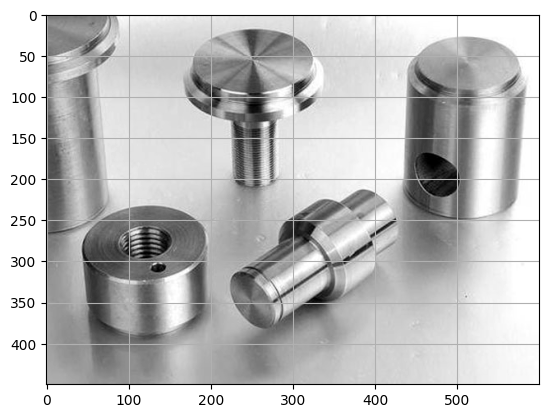

In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
print('OpenCV version: ' + cv2.__version__)

from matplotlib import pyplot as plt

import numpy as np

# Read image
img = cv2.imread("./data/mechanicals.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.grid('off')
plt.show()

## Es 1: Canny

Applicare la funzione *Canny()* delle OpenCV all'immagine *mechanicals.jpg*. Si provino diversi valori di soglia e si scelgano quelli che producono un risultato visivamente migliore.

--- Original Grayscale Image ---


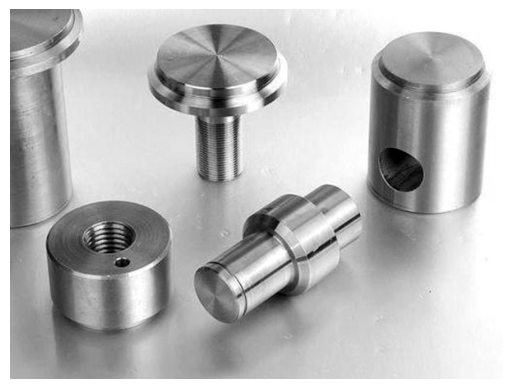

--- Canny edge (low threshold --> weak edges ) ---


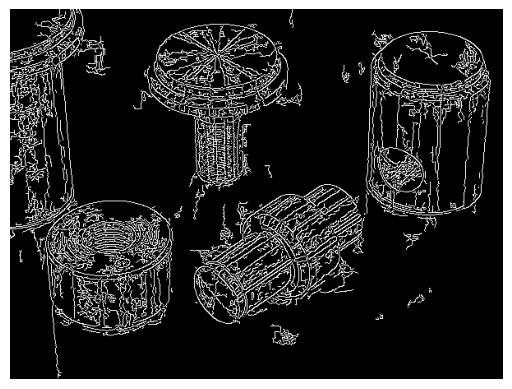

--- Canny edge (high threshold --> strong edges ) ---


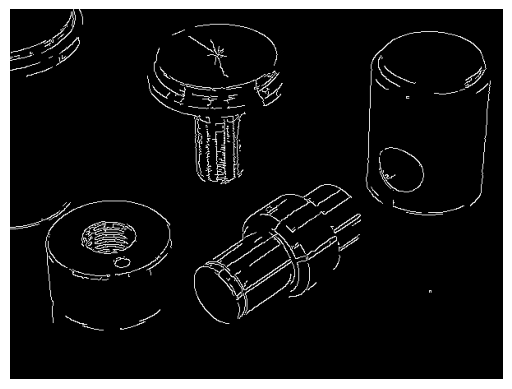

--- Canny edge ---


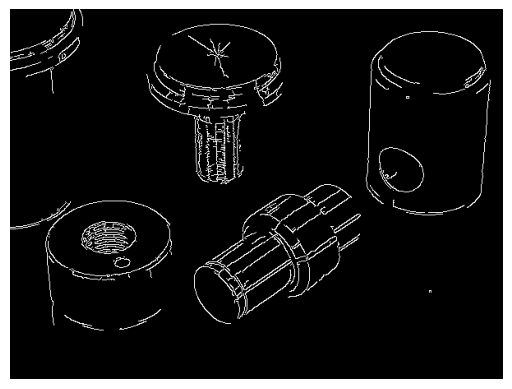

In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
from matplotlib import pyplot as plt

import numpy as np
import time

img = cv2.imread("data/mechanicals.jpg", cv2.IMREAD_GRAYSCALE)

print('--- Original Grayscale Image ---')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

sigma = 0.33
v = np.median(img)

print('--- Canny edge (low threshold --> weak edges ) ---')
out = cv2.Canny(img, 1, 100)
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()


print('--- Canny edge (high threshold --> strong edges ) ---')
out = cv2.Canny(img, 150, 250)
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()

print('--- Canny edge ---')
# Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
out = cv2.Canny(img, lower, upper)
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()


## Es 1-bis: Sobel

Si applichi la funzione *Sobel()* delle OpenCV per l'estrazione dei gradienti lungo l'asse x e lungo l'asse y dell'immagine *mechanicals.jpg*. Si visualizzino i gradienti riscalando opportunamente gli output della funzione *Sobel()*. Si combinino i gradienti per l'estrazione dei contorni dell'immagine (G = [Sx]^2 + [Sy]^2). Si visualizzi l'immagine G così ottenuta facendo attenzione alla scala.

--- Original Grayscale Image ---


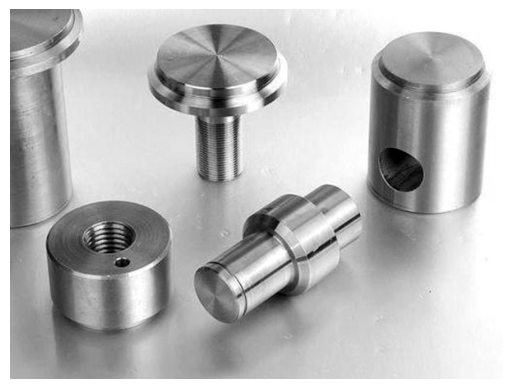

--- Gradients Along x and y ---


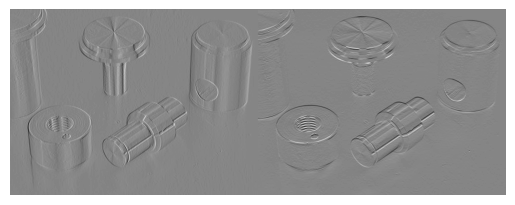

--- Gradients Along x and y ---


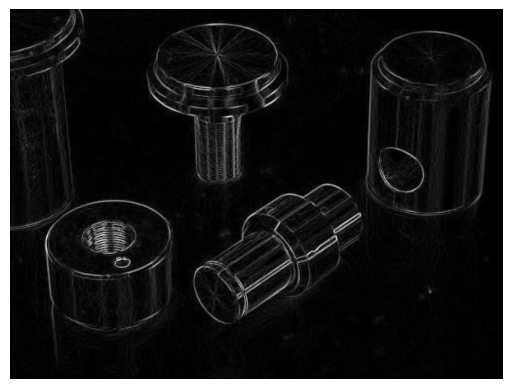

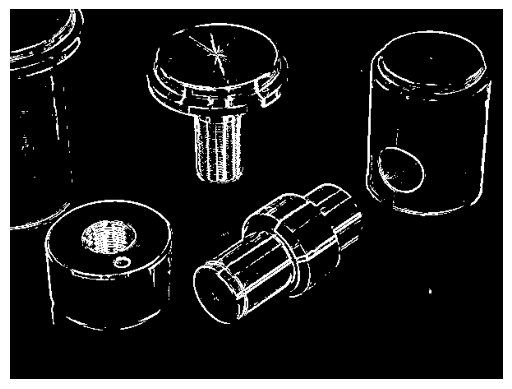

In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np

import time

img = cv2.imread("data/mechanicals.jpg", cv2.IMREAD_GRAYSCALE)

print('--- Original Grayscale Image ---')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

sobelx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
sobelx_show = sobelx/8.0 + 128

sobely = cv2.Sobel(img, cv2.CV_32F, 0, 1)
sobely_show = sobely/8.0 + 128

sobel_show = cv2.hconcat([sobelx_show,sobely_show])

print('--- Gradients Along x and y ---')
plt.imshow(sobel_show, cmap='gray', )
plt.axis('off')
plt.show()

print('--- Gradients Along x and y ---')
sobel_mag = np.sqrt(sobelx*sobelx + sobely*sobely)
sobel_mag_show = sobel_mag/np.sqrt(32)

plt.imshow(sobel_mag_show, cmap='gray')
plt.axis('off')
plt.show()

#sobel_mag[sobel_mag >= 128] = 255
#sobel_mag[sobel_mag < 128] = 0

_, sobel_binary = cv2.threshold(sobel_mag, 128, 255, cv2.THRESH_BINARY)
plt.imshow(sobel_binary, cmap='gray')
plt.axis('off')
plt.show()


## Es 2: Template matching (Sum of Squared Difference - SSD)

Si implementi una funzione che applica la formula SSD per il  template matching. La funzione prende in input sia l'immagine di riferimento (template) che quella su cui eseguire la ricerca e restituisce il risultato ottenuto applicando la somma dei quadrati delle differenze. Si testi la funzione sulle immagini *Einstein.jpg*  (immagine su cui cercare il template) e *Einstein_eye_small.png* (template).

Funzioni utili delle OpenCV:

- *minMaxLoc()*

- *rectangle()*


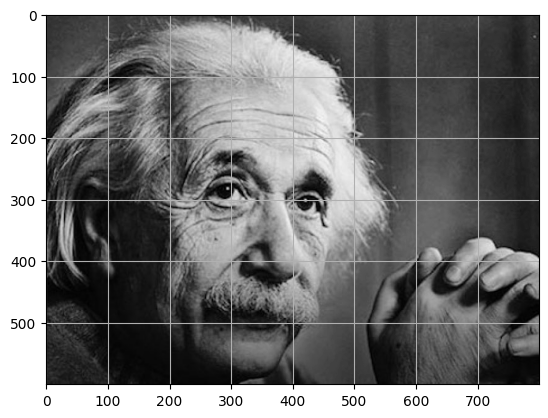

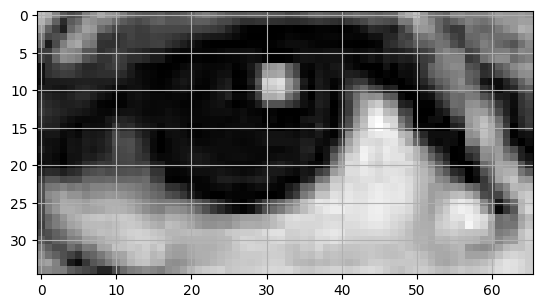

(35, 66)
(35, 65)
min: 46.0 max: 52454736.0 min-pos: (263, 273) max-pos: (429, 153)


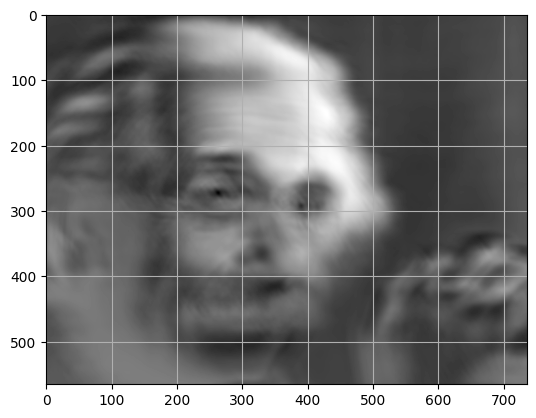

min: 6780892.0 max: 52454736.0 min-pos: (110, 87) max-pos: (429, 153)


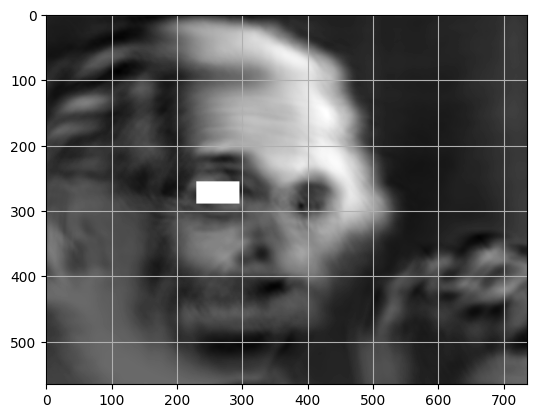

min: 7346193.0 max: 52454736.0 min-pos: (349, 416) max-pos: (77, 70)


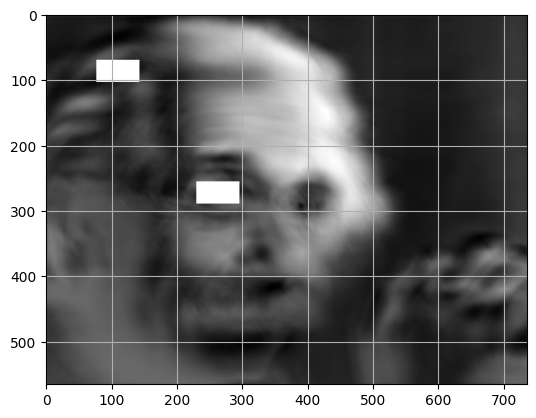

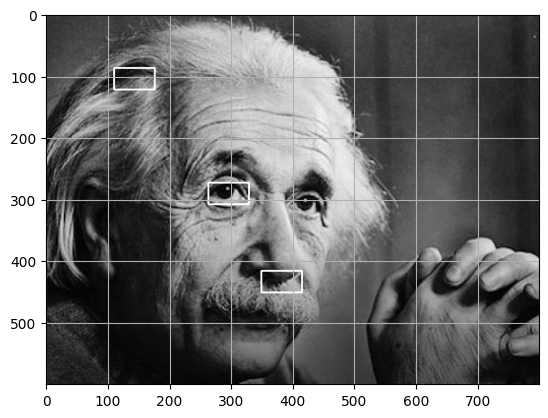

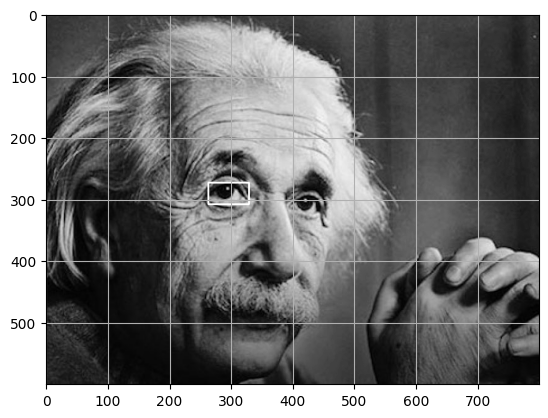

In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

from matplotlib import pyplot as plt

import numpy as np

import time # To compare execution times

# Template matching with SSD, 'ref' is the image to be searched inside 'img'
def TemplateMatchingSsd(img, ref):
  print(ref.shape)
  ref = ref[0: (ref.shape[0] - (ref.shape[0] - 1) % 2), 0:(ref.shape[1] - (ref.shape[1] - 1) % 2)]
  print(ref.shape)

  img = img.astype(np.int32)
  ref = ref.astype(np.int32)

  rows = img.shape[0]
  cols = img.shape[1]

  ref_rows = ref.shape[0]
  ref_cols = ref.shape[1]

  radius_x = ref_cols // 2
  radius_y = ref_rows // 2

  matching = np.zeros((rows - radius_y * 2, cols - radius_x * 2), dtype=np.int64)

  for r in range(radius_y, rows - radius_y):
    for c in range (radius_x, cols - radius_x):
      matching[r - radius_y, c - radius_x] = np.sum((ref - img[r - radius_y:r + radius_y + 1, c - radius_x:c + radius_x + 1]) ** 2)

  return matching

img = cv2.imread("./data/Einstein.jpg", cv2.IMREAD_GRAYSCALE)
ref = cv2.imread("./data/Einstein_eye_small.png", cv2.IMREAD_GRAYSCALE)

img_clone = img.copy()

plt.imshow(img, cmap='gray')
plt.grid('off')
plt.show()

plt.imshow(ref, cmap='gray')
plt.grid('off')
plt.show()

matching = TemplateMatchingSsd(img, ref)
matching_clone = matching.copy()

#res_OpenCV = cv2.matchTemplate(img, ref, cv2.TM_SQDIFF)
#plt.imshow(res_OpenCV, cmap='gray')
#plt.grid('off')
#plt.show()

# non maxima suppresion
n_max = 3
for i in range(n_max):
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(matching)

  print("min: " + str(min_val) + " max: " + str(max_val) + " min-pos: " + str(min_loc) + " max-pos: " + str(max_loc))

  plt.imshow(matching, cmap='gray')
  plt.grid('off')
  plt.show()

  matching[(min_loc[1] - ref.shape[0] // 2):(min_loc[1] + ref.shape[0] // 2), (min_loc[0] - ref.shape[1] // 2 ):(min_loc[0] + ref.shape[1] // 2)] = matching.max()

  top_left = (min_loc[0], min_loc[1])
  bottom_right = (min_loc[0] + ref.shape[1], min_loc[1] + ref.shape[0])

  cv2.rectangle(img, top_left, bottom_right, 255, 2)

plt.imshow(img, cmap='gray')
plt.grid('off')
plt.show()


# all values under a threshold
thr = matching_clone.min() * 1.2
loc = np.where( matching_clone <= thr)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_clone, pt, (pt[0] + ref.shape[1], pt[1] + ref.shape[0]), 255, 2)

plt.imshow(img_clone, cmap='gray')
plt.grid('off')
plt.show()



## Es 3: Template Matching OpenCV

Si provino i diversi metodi di template matching disponibili nelle OpenCV,  la funzione a cui fare riferimento è *matchTemplate()*  e le immagini da utilizzare per i test sono *Messi.jpg*  (immagine su cui cercare il template) e *Messi_face_small.jpg* (template).



--- cv2.TM_CCOEFF ---


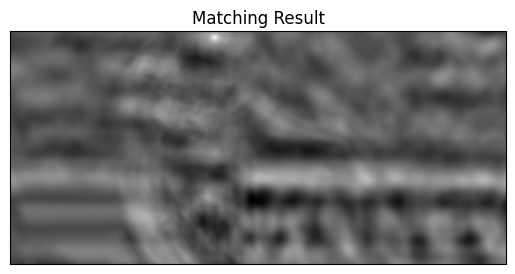

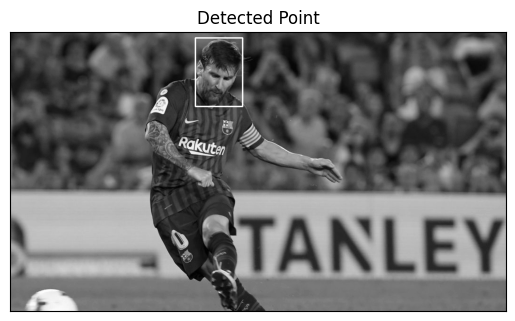

--- cv2.TM_CCOEFF_NORMED ---


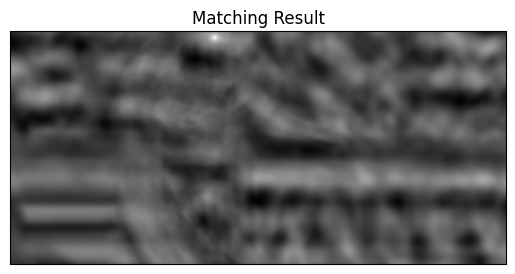

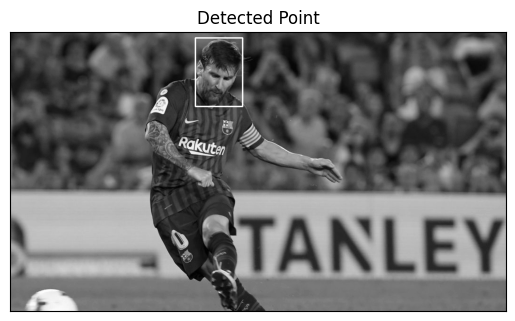

--- cv2.TM_CCORR ---


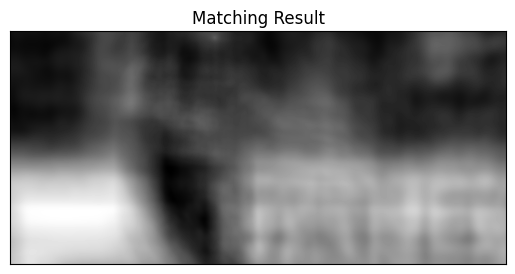

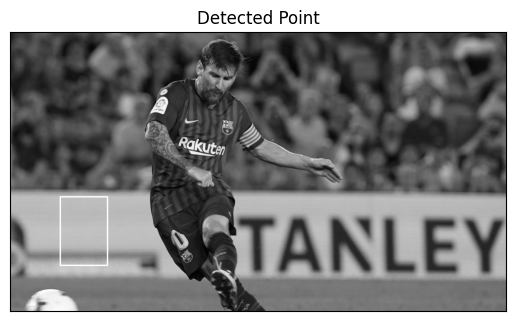

--- cv2.TM_CCORR_NORMED ---


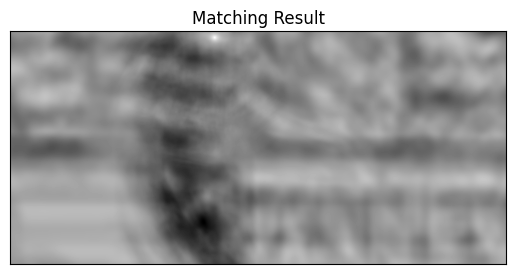

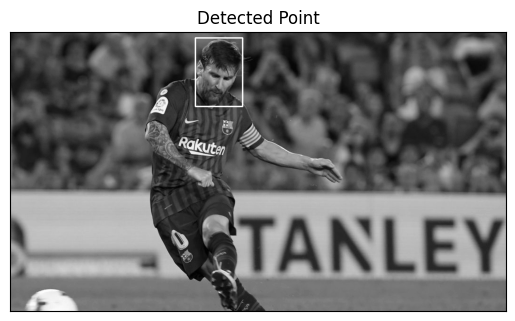

--- cv2.TM_SQDIFF ---


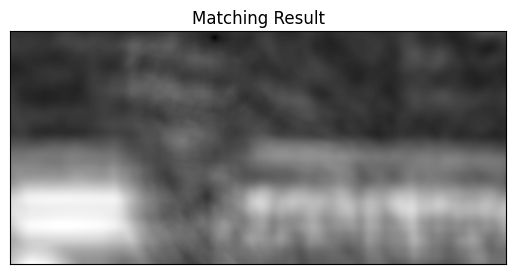

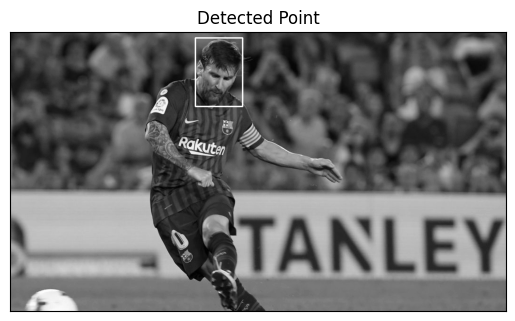

--- cv2.TM_SQDIFF_NORMED ---


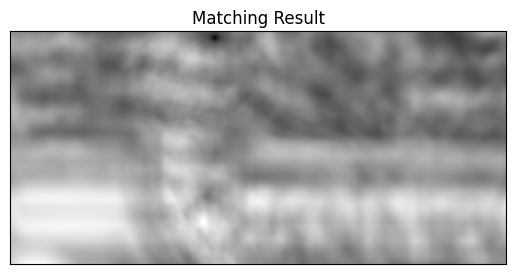

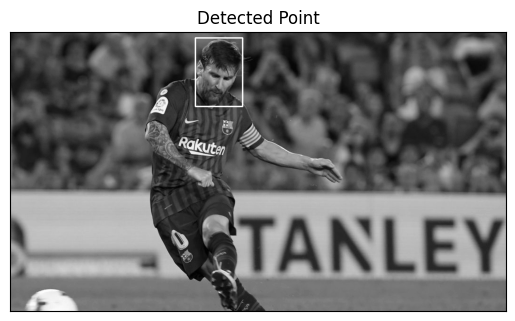

In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

from matplotlib import pyplot as plt

import numpy as np

img = cv2.imread('./data/Messi.jpg', cv2.IMREAD_GRAYSCALE)

img2 = img.copy()

template = cv2.imread('./data/Messi_face_small.jpg', cv2.IMREAD_GRAYSCALE)

w, h = template.shape[::-1]

# OpenCV template matching methods
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    print('--- ' + meth + ' ---')
    plt.imshow(res, cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.show()
    plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()

## Es 4: Harris

Si implementi l'algoritmo di Harris e lo si testi sulle immagini del Dipartimento di Ingegneria "Enzo Ferrari". Si confronti il risultato ottenuto con quello della funzione  *cornerHarris()* delle OpenCV

Funzioni utili delle OpenCV per l'implementazione dell'algoritmo di Harris:

- *Sobel()*

- *GaussianBlur()*

- *normalize()*



--- Original Grayscale Image ---


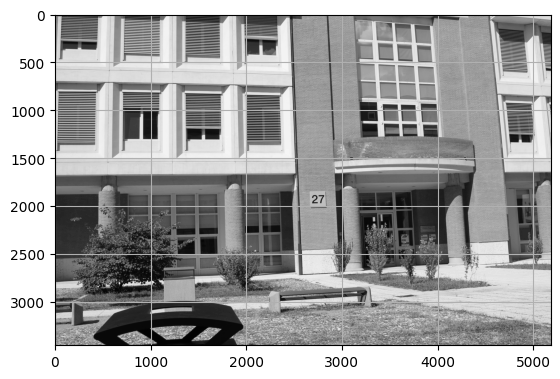

--- Image derivatives along x and y (Ix and Iy) ---


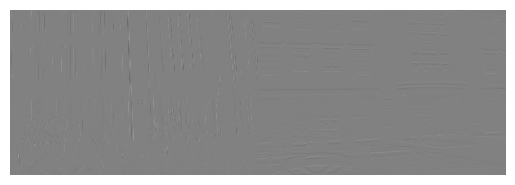

0.0 227.25
0.0 211.0
86.36328 175.229
--- Square of derivatives Ix^2, Iy^2, IxIy ---


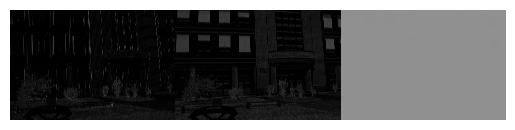

--- Gaussian filtered images g(Ix^2), g(Iy^2), g(IxIy) ---
0.0 227.25
0.0 211.0
86.36328 175.229


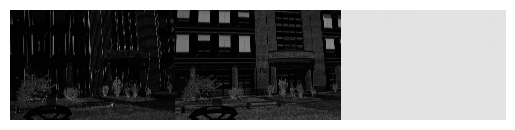

--- Harris ---
2.6856787e-07 254.99998


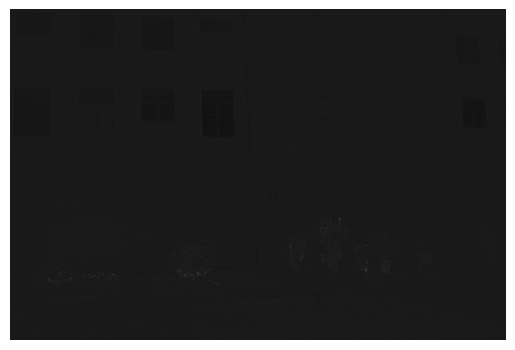

--- Harris OpenCV ---


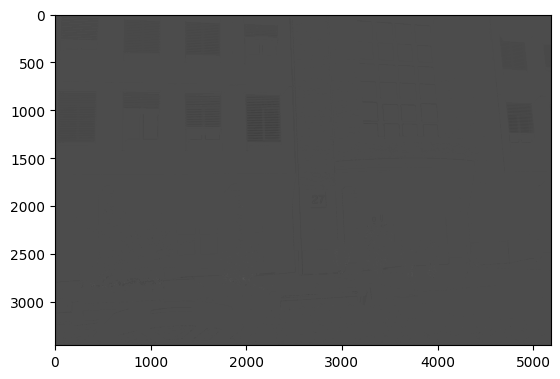

In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

from matplotlib import pyplot as plt

import numpy as np

alpha = 0.04 # it should be in range [0.04, 0.06]

print('--- Original Grayscale Image ---')
img = cv2.imread("./data/dief_02.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.grid('off')
plt.show()

sobelx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
sobelx_show = sobelx/8.0 + 128

sobely = cv2.Sobel(img, cv2.CV_32F, 0, 1)
sobely_show = sobely/8.0 + 128

sobel_show = cv2.hconcat([sobelx_show,sobely_show])

print('--- Image derivatives along x and y (Ix and Iy) ---')
plt.imshow(sobel_show, cmap='gray')
plt.axis('off')
plt.show()

Ix_2 = sobelx*sobelx
Iy_2 = sobely*sobely
IxIy = sobelx*sobely

Ix_2_show = np.sqrt(Ix_2)/4
print(str(Ix_2_show.min()) + " " + str(Ix_2_show.max()))

Iy_2_show = np.sqrt(Iy_2)/4
print(str(Iy_2_show.min()) + " " + str(Iy_2_show.max()))

IxIy_show = IxIy/(2 ** 13) + 128
print(str(IxIy_show.min()) + " " + str(IxIy_show.max()))

print('--- Square of derivatives Ix^2, Iy^2, IxIy ---')
sobel_show = cv2.hconcat([Ix_2_show, Iy_2_show, IxIy_show])
plt.imshow(sobel_show, cmap='gray')
plt.axis('off')
plt.show()

print('--- Gaussian filtered images g(Ix^2), g(Iy^2), g(IxIy) ---')
g_Ix_2 = cv2.GaussianBlur(Ix_2, (7, 7), 0)
g_Iy_2 = cv2.GaussianBlur(Iy_2, (7, 7), 0)
g_IxIy = cv2.GaussianBlur(IxIy, (7, 7), 0)

g_Ix_2_show = np.sqrt(g_Ix_2)/4
print(str(Ix_2_show.min()) + " " + str(Ix_2_show.max()))

g_Iy_2_show = np.sqrt(g_Iy_2)/4
print(str(Iy_2_show.min()) + " " + str(Iy_2_show.max()))

g_IxIy_show = g_IxIy/(2 ** 13) + 128
print(str(IxIy_show.min()) + " " + str(IxIy_show.max()))

sobel_show = cv2.hconcat([g_Ix_2_show, g_Iy_2_show, g_IxIy_show])
plt.imshow(sobel_show, cmap='gray')
plt.axis('off')
plt.show()

print('--- Harris ---')
har = g_Ix_2*g_Iy_2 - g_IxIy*g_IxIy - alpha*((g_Ix_2 + g_Iy_2) ** 2)
har_show = cv2.normalize(har, None, 0, 255, cv2.NORM_MINMAX)
print(str(har_show.min()) + " " + str(har_show.max()))

plt.imshow(har_show, cmap='gray')
plt.axis('off')
plt.show()

print('--- Harris OpenCV ---')
har_opencv = cv2.cornerHarris(img, 2, 3, 0.04)
plt.imshow(har_opencv, cmap='gray')
plt.show()


## Es 5: SIFT - Scale-Invariant Feature Transform

Utilizzare le OpenCV per l'estrazione e la visualizzazione dei descrittori SIFT sull'immagine *duomo.png*

ERROR: Could not find a version that satisfies the requirement opencv-python==3.3.0.10 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80)
ERROR: No matching distribution found for opencv-python==3.3.0.10
4.9.0
--- Original Grayscale Image ---


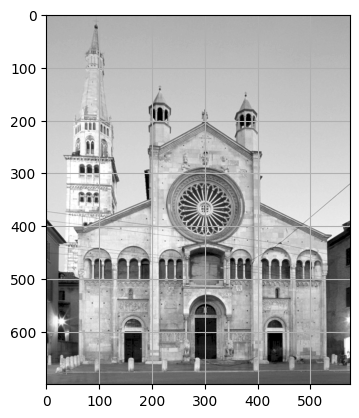

AttributeError: module 'cv2.xfeatures2d' has no attribute 'SIFT_create'

In [ ]:
#!pip3 install opencv-contrib-python==3.3.0.10 --force-reinstall # A restart of the runtime is required. Then the script should be run without this line of code.

import cv2
print(cv2.__version__)

from matplotlib import pyplot as plt

import numpy as np
import cv2.xfeatures2d

img = cv2.imread("./data/duomo.png", cv2.IMREAD_GRAYSCALE)
print('--- Original Grayscale Image ---')
plt.imshow(img, cmap='gray')
plt.grid('off')
plt.show()

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(img, None)

img = cv2.drawKeypoints(img, kp, None)

print('--- Grayscale Image with Keypoints ---')
plt.imshow(img, cmap='gray')
plt.grid('off')
plt.show()